In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Achieving Over 80% Accuracy in Kaggle's Titanic Disaster Competition

In this post, I will outline a step-by-step approach to achieving over 80% accuracy in Kaggle's Titanic Disaster Competition. While our primary objective is to attain high accuracy, this project also serves as an excellent learning opportunity for newcomers to data science or those seeking a refresher on the subject.

## Overview

The Titanic Disaster Competition on Kaggle is a classic machine learning challenge where the task is to predict the survival of passengers aboard the Titanic based on various features such as age, sex, ticket class, and others.

## Steps to Achieve Over 80% Accuracy

### 1. Data Exploration and Preprocessing

- **Load the Data**: Begin by loading the training and testing datasets provided by Kaggle.
- **Explore the Data**: Understand the structure of the data, including features, missing values, and data types.
- **Handle Missing Values**: Deal with missing values in the dataset by imputing or dropping them based on the context of the data.
- **Feature Engineering**: Create new features from existing ones, such as extracting titles from names or creating family size features.
- **Encode Categorical Variables**: Convert categorical variables into numerical representations using techniques like one-hot encoding or label encoding.

### 2. Feature Selection

- **Correlation Analysis**: Identify highly correlated features and consider removing redundant ones to improve model performance.
- **Feature Importance**: Utilize techniques like Random Forest or Gradient Boosting to determine the importance of features and select the most relevant ones for training the model.

### 3. Model Selection and Training

- **Choose Algorithms**: Experiment with various machine learning algorithms such as Random Forest, Support Vector Machines, Logistic Regression, etc.
- **Cross-Validation**: Employ cross-validation techniques to assess the performance of different models and avoid overfitting.
- **Hyperparameter Tuning**: Fine-tune the parameters of selected models using techniques like grid search or random search to optimize performance.

### 4. Model Evaluation and Validation

- **Evaluation Metrics**: Assess the performance of the trained models using appropriate evaluation metrics such as accuracy, precision, recall, or F1-score.
- **Validation Set**: Validate the model on a separate validation set to ensure its generalization performance.
- **Ensemble Methods**: Consider using ensemble methods like bagging or boosting to combine multiple models for improved accuracy.

### 5. Submission and Post-Processing

- **Generate Predictions**: Make predictions on the test dataset using the trained model.
- **Submit to Kaggle**: Submit the predictions to the Kaggle competition and evaluate the model's performance based on the public leaderboard.
- **Refinement**: Refine the model based on feedback from the leaderboard and iterate on the process to improve accuracy further.

## Conclusion

By following the outlined steps and leveraging techniques such as data manipulation, feature engineering, and machine learning algorithms, achieving over 80% accuracy in Kaggle's Titanic Disaster Competition is feasible. Moreover, this project serves as an educational resource for individuals looking to enhance their skills in data science and machine learning.


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = pd.concat([train,test],axis=0)


First of all, we will quickly examine the data set (EDA), and then we will determine if there are outliers. We will fill in any missing data, if there are any. We interpret the notable results based on the correlations found in the dataset between the independent and dependent variables. A machine-learning model is going to be developed based on these findings. The process is displayed below.For exploratory data analysis, we will use .head(), info(), describe() functions.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


Considering that you have reviewed the data before, I am going through these parts a little fast because of not extending the reading time. 
In order to visually examine the dataset, we will first divide the columns of the data into numerical columns and categorical columns. Thus, we can more easily show the relationship of these columns with the "Survived" variable, that is, the target variable.
We use the function "grab_col_names()" to separate the columns according to their types. This function separates the columns in the data into numerical, categorical, numerical but originally categorical, and categorical  but originally cardinal.

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    It provides the names of categorical, numerical, and categorical but cardinal variables in the dataset.
    Note: Numerical-looking categorical variables are also included in the categorical variables.
    
    Parameters
    ------
        dataframe: dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                Threshold value for variables that are numerical but categorical.
        car_th: int, optinal
                Threshold value for variables that are categorical but cardinal.
    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of categorical variables that appear to be cardinal
   
    
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is within cat_cols
        The sum of the 3 lists returned equals the total number of variables: 
        cat_cols + num_cols + cat_but_car = total number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [7]:
cat_cols,num_cols,cat_but_car = grab_col_names(train)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


Since the "Survived" variable is already filled, only the "train" dataset is used when visualizing and analyzing our data.

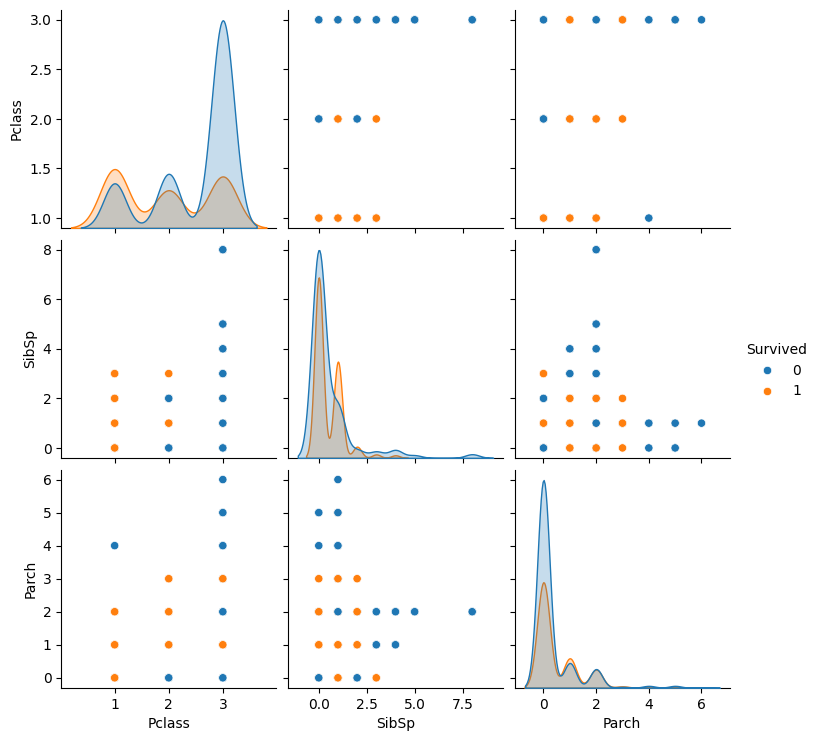

In [8]:
sns.pairplot(train[cat_cols],hue="Survived")

In the image we created using categorical variables, it is seen that the Survived (blue and orange) variable shows serious differences at certain points.


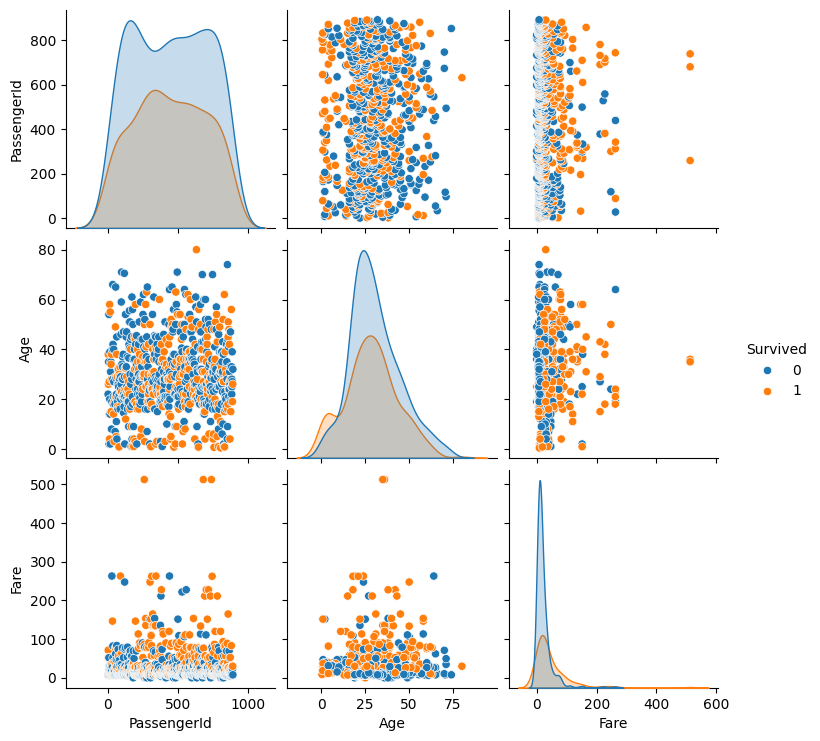

In [9]:
num_cols.append("Survived")
sns.pairplot(train[num_cols],hue="Survived")

The "Survived" effect of numerical variables is seen above. It is observed that there are significant differences at certain points of the variable "Fare" and "Age".

**Outliers**

The best way to identify outliers is to draw a boxplot. Thus, we can easily determine visually whether there is an outlier or not.

<Axes: >

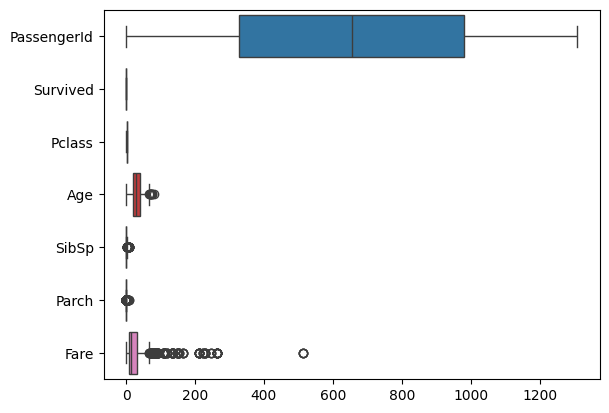

In [10]:
### Outliers Check

sns.boxplot(df,orient="h")

## in this dataset i act like we dont have any outliers


"Fare", "Age" are outliers of the dataset.

The maximum values of "Age" and "Fare" are 80 and 512, respectively. 512 seems reasonable for a trip like this, and it makes sense that the oldest passenger on this trip is 80 years old. We do not transact with outliers in order to preserve the data's authenticity.
Missing Values

Missing Values

To detect our missing values in the data, ,we are using isnull().sum() function. In fact, we had detected our data missing in the info() function at the EDA stage.

In [11]:
####Missing Values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

It is normal that the 418 survived missing value in the df dataset is empty, as we will predict these missing values. We can start filling in the missing values of the "Fare", "Age", "Cabin" and "Embarked" columns, respectively.

<Axes: xlabel='Fare', ylabel='Count'>

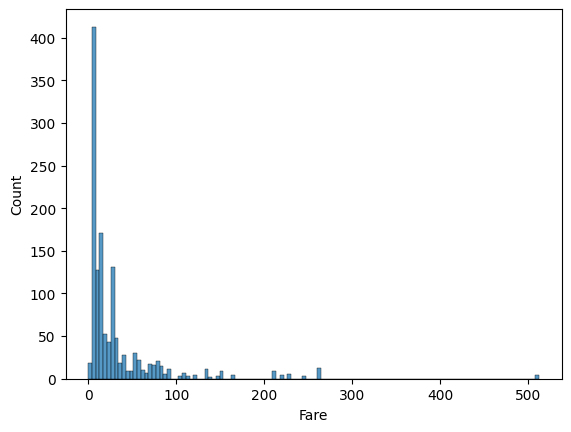

In [12]:
### Survived-Age-Fare-Cabin-Embarked
### First Easy ones--Fare
sns.histplot(df["Fare"])

The "Fare" column has one missing value; the normal distribution of the "Fare" column is observed to be skewed to the right. For that reason, we will use the median of "Fare" to fill in the missing value in the data.

In [13]:
## Because of distribution we will use median

df["Fare"]= df["Fare"].fillna(df["Fare"].median())

The "Embark" columns has 2 missing values. "Embark" column is a categorical column so we can fill the missing values by looking the most frequent observe.

<Axes: xlabel='Embarked', ylabel='Count'>

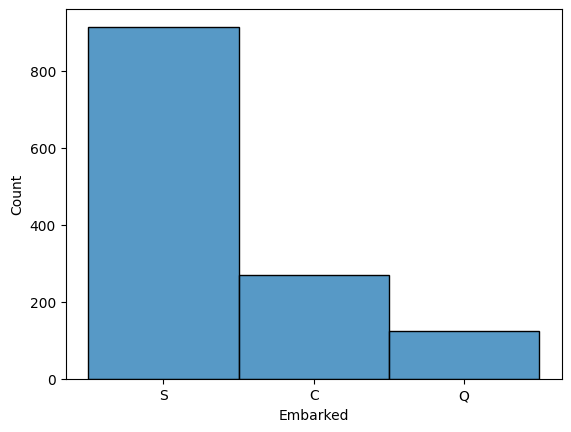

In [14]:
### Embarked
sns.histplot(df["Embarked"])

The most frequent variable is "S". To fill it with the most frequent variable, we will use the mode() function.

In [15]:
## We will use mode for this
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

The "Cabin" column has 1014 missing values. To decide what to do, let's examine the distribution of the "Cabin" variable.

In [16]:
### Cabin
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

It is estimated that these "Cabin" numbers belong to passengers. So what about the employees? It can be concluded from basic web research that Titanic employs roughly 1000 people. This clarifies the cause of the "Cabin" column's missing values. We will define the cabins of the employees as "X". Therefore, we will assign "X" to the missing values.


In [17]:
### There were nearly 1000 workers in titanic so we can think Nan as workers so we will fill it with X
df["Cabin"] = df["Cabin"].fillna("X")

Now we will complete the missing values of the "Age" column. For this purpose, using the titles found in the "Name" column, we will obtain an average age based on the titles, and we will fill in this average age according to the title. First of all, let's create a separate "Title" by extracting from "Name" column.

In [18]:
#### Age we use corrmap before that we need to deal with Name in order to use title so we can calculate average age

df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
df["Title"].nunique()
df["Title"].unique()
### To much title
new_title = {
    'Mr' : 'Mr',
    'Ms' : 'Ms',
    'Mrs' : 'Mrs',
    'Rev' : 'officer',
    'Sir' : 'royalty',
    'the Countess' : 'royalty',
    'Dona' : 'royalty',
    'Capt' : 'officer',
    'Col' : 'officer',
    'Don' : 'royalty',
    'Dr' : 'officer',
    'Jonkheer' : 'royalty',
    'Lady' : 'royalty',
    'Major' : 'officer',
    'Master' : 'kid',
    'Miss' : 'Ms',
    'Mlle' : 'Ms',
    'Mme' : 'Mrs',
    'the Countess' :'royalty'

}

df["Title"] = df["Title"].map(new_title)

Age" variable is highly related to the "Pclass", "Title" and "Sex" variables. That's why I decided to create an average age group by grouping these 3 variables.

In [19]:
age_mean_by_group = df.groupby(['Title', 'Sex', 'Pclass'])['Age'].transform("mean")
df['Age'] = df['Age'].fillna(age_mean_by_group)

In [20]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
dtype: int64

****Feature Engineering

We will use Feature Engineering methods to extract new variables so that the machine learning model can more accurately predict and make meaning from the information that is accessible.
Initially, we split the "Age" variable into age group categories in order to produce the "Age_Group" variable. We categorize the age group into seven groups, mostly due to the increased survival rate of younger passengers.

In [21]:
age_bins = [df["Age"].min(), 5, 13, 18, 30, 40, 56, df['Age'].max()+1]
age_labels = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']

# Use pd.cut to categorize the 'Age' column into the specified age groups
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


          Age    Age_Group
0    22.00000  Young Adult
1    38.00000        Adult
2    26.00000  Young Adult
3    35.00000        Adult
4    35.00000        Adult
..        ...          ...
413  28.31891  Young Adult
414  39.00000        Adult
415  38.50000        Adult
416  28.31891  Young Adult
417   6.09000        Child

[1309 rows x 2 columns]


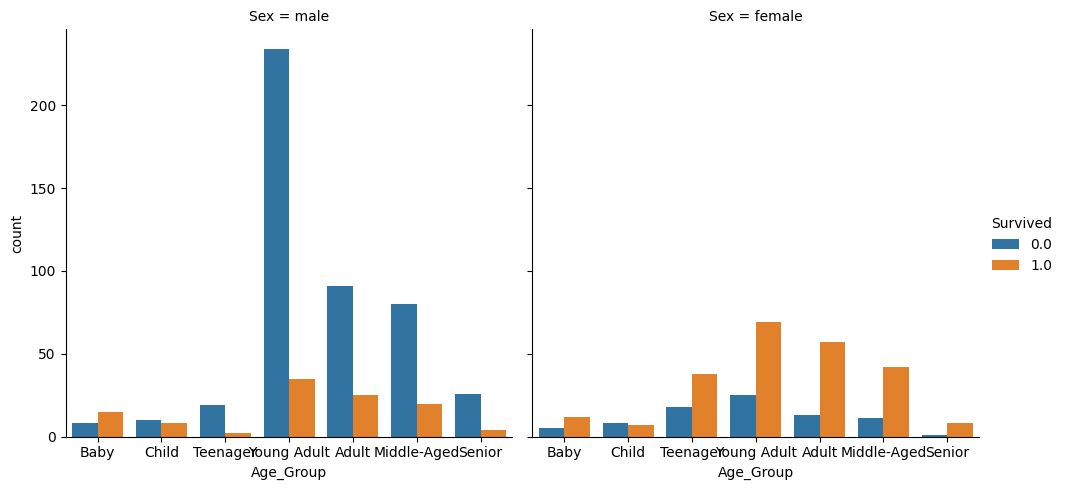

In [22]:
# Display the DataFrame with the newly added 'Age_Group' column
df_filtered = df.iloc[:891,:]

print(df[['Age', 'Age_Group']])
sns.catplot(x='Age_Group', hue='Survived',col="Sex", data=df_filtered,kind="count")

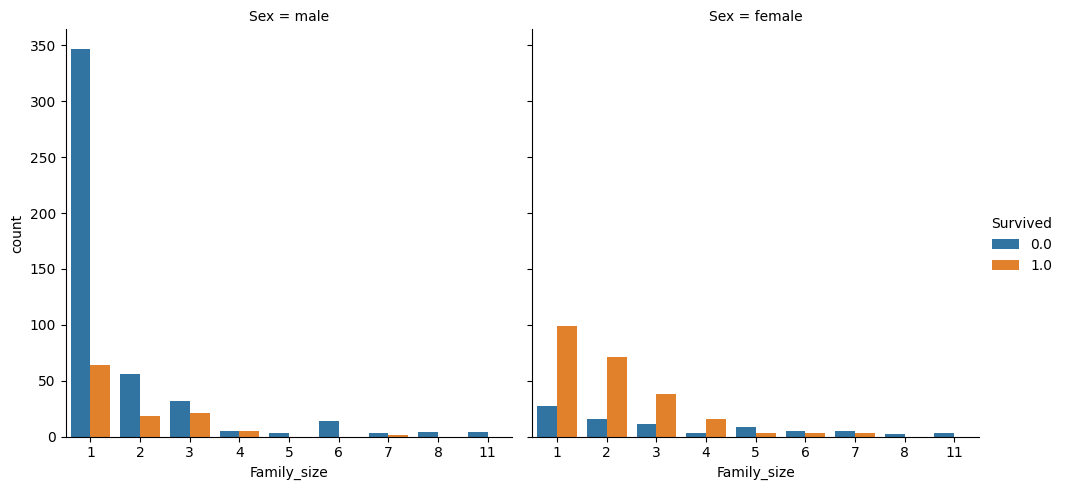

In [23]:
###Parch-sipsb
df["Family_size"] = df["Parch"] +df["SibSp"] + 1
df_filtered = df.iloc[:891,:]
sns.catplot(x='Family_size', hue='Survived',col="Sex", data=df_filtered,kind="count")

"Parch" and "SibSp" indicate the number of spouse and childen. With these two variables, we find the number of the family when we collect the passenger himself. By creating a categorical variable "Family_Group" using this number, we can find the survival breakage according to the family size.

In [24]:
### we see alone man sacrifices no hope for life
family_map = {1: 'Alone', 
              2: 'Small', 
              3: 'Small', 
              4: 'Small', 
              5: 'Medium', 
              6: 'Medium', 
              7: 'Large', 
              8: 'Large', 
              11: 'Large'}

df['Family_Group'] = df['Family_size'].map(family_map)

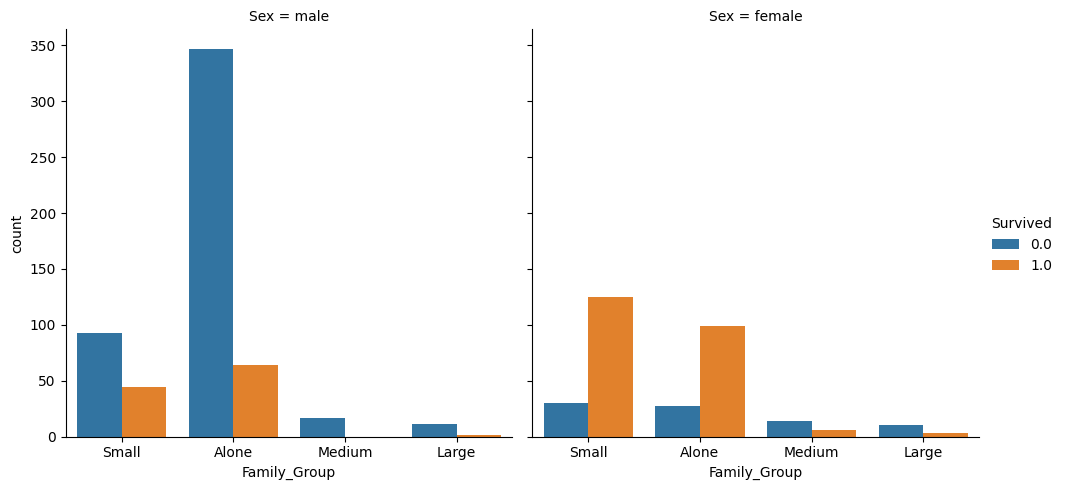

In [25]:
df_filtered = df.iloc[:891,:]
sns.catplot(x='Family_Group', hue='Survived',col="Sex", data=df_filtered,kind="count")

Taking the first letter of the "Cabin" variable, we create the categorical variable "Cabin_Letter".

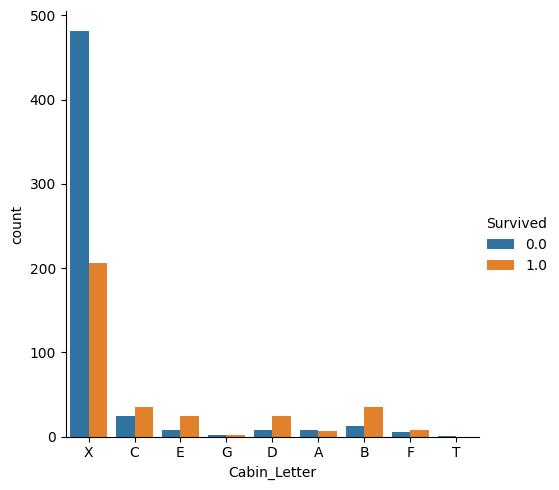

In [26]:
#### Cabin
df["Cabin_Letter"] = df["Cabin"].str[0]
df_filtered = df.iloc[:891,:]
sns.catplot(x='Cabin_Letter', hue='Survived', data=df_filtered,kind="count")

<Axes: xlabel='Fare', ylabel='Count'>

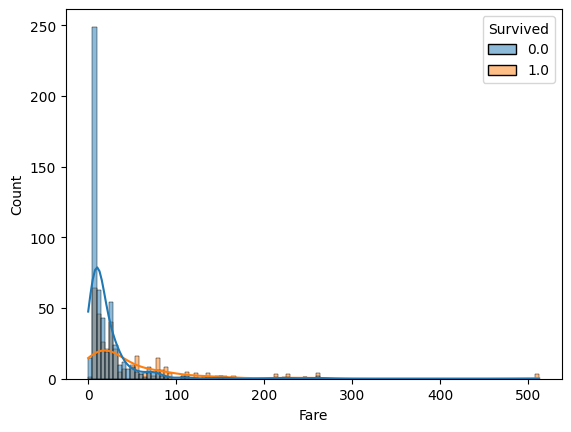

In [27]:
#### Fare
sns.histplot(data = df_filtered, x = 'Fare', hue = 'Survived',kde = True)

Using the qcut() function, we split the values of the numerical variable "Fare" into five segments to generate the categorical variable "Fare_Category".

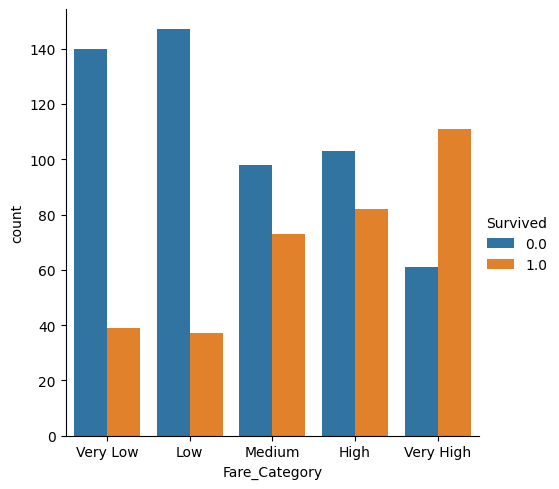

In [28]:
df["Fare_Category"] = pd.qcut(df['Fare'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df_filtered = df.iloc[:891,:]
sns.catplot(x='Fare_Category', hue='Survived', data=df_filtered,kind="count")

In [29]:
for column in df_filtered.columns:
    if df_filtered[column].dtype == 'object':
        print('Survival Correlation by:', column)
        print(df_filtered.groupby(column)['Survived'].mean())
        print('-' * 10, '\n')

Survival Correlation by: Name
Name
Abbing, Mr. Anthony                      0.0
Abbott, Mr. Rossmore Edward              0.0
Abbott, Mrs. Stanton (Rosa Hunt)         1.0
Abelson, Mr. Samuel                      0.0
Abelson, Mrs. Samuel (Hannah Wizosky)    1.0
                                        ... 
de Mulder, Mr. Theodore                  1.0
de Pelsmaeker, Mr. Alfons                0.0
del Carlo, Mr. Sebastiano                0.0
van Billiard, Mr. Austin Blyler          0.0
van Melkebeke, Mr. Philemon              0.0
Name: Survived, Length: 891, dtype: float64
---------- 

Survival Correlation by: Sex
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
---------- 

Survival Correlation by: Ticket
Ticket
110152         1.000000
110413         0.666667
110465         0.000000
110564         1.000000
110813         1.000000
                 ...   
W./C. 6608     0.000000
W./C. 6609     0.000000
W.E.P. 5734    0.000000
W/C 14208      0.000000
WE/P 5735      0.50

In [30]:

### Ticket
df["Ticket"].describe().T

df["Last_Name"] = df["Name"].str.split(",").str[0]
df_filtered = df.iloc[:891,:]

duplicate_ticket = []

for ticket in df["Ticket"].unique():
    same_ticket = df[df["Ticket"]==ticket]["Ticket"]
    if same_ticket.count()>1:
        duplicate_ticket.append(df.loc[df["Ticket"]== ticket,["Ticket","Last_Name","Fare","Family_size","Survived"]])
duplicate_ticket = pd.concat(duplicate_ticket)
duplicate_ticket.head(20)

,Ticket,Last_Name,Fare,Family_size,Survived
1,PC 17599,Cumings,71.2833,2,1.0
234,PC 17599,Cumings,71.2833,2,NaN
3,113803,Futrelle,53.1000,2,1.0
137,113803,Futrelle,53.1000,2,0.0
6,17463,McCarthy,51.8625,1,0.0
146,17463,Hilliard,51.8625,1,NaN
7,349909,Palsson,21.0750,5,0.0
24,349909,Palsson,21.0750,5,0.0
374,349909,Palsson,21.0750,5,0.0
567,349909,Palsson,21.0750,5,0.0


The variable "Ticket_Survival_Rate" helps us find out the probability of people who have the same ticket getting saved. By default, their value is defined as 0.5. "Ticket_Survival_Rate" is set to 1 if even one passenger who had the same ticket survived. In the event that nobody lived, it is given a 0.

In [31]:

df["Ticket_Survival_Rate"] = 0.5  #(Default values)

for _, data_same in df.groupby('Ticket'):
    if (len(data_same) > 1):
        for ind, row in data_same.iterrows():
            smax = data_same.drop(ind)['Survived'].max()
            smin = data_same.drop(ind)['Survived'].min()
            passid = row['PassengerId']
            
            if (smax == 1):
                df.loc[df['PassengerId'] == passid, "Ticket_Survival_Rate"] = 1
            elif (smin == 0):
                df.loc[df['PassengerId'] == passid, "Ticket_Survival_Rate"] = 0

df.groupby("Ticket_Survival_Rate")['Survived'].mean()

Ticket_Survival_Rate
0.0    0.225352
0.5    0.297989
1.0    0.727723
Name: Survived, dtype: float64

In [32]:
df["Ticket_Survival_Rate"] = df["Ticket_Survival_Rate"].astype(str)

In [33]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Age_Group',
       'Family_size', 'Family_Group', 'Cabin_Letter', 'Fare_Category',
       'Last_Name', 'Ticket_Survival_Rate'],
      dtype='object')

The fact that we use all of its variables in machine learning does not make the algorithm's job easier, we exclude some variables from the data that machine learning algorithms cannot establish meaningful operations.

In [34]:
## unnecessary ones
df_final = df.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Last_Name"])
df_filtered = df_final.iloc[:891,:]

Observations: 1309
Variables: 13
cat_cols: 11
num_cols: 2
cat_but_car: 0
num_but_cat: 5


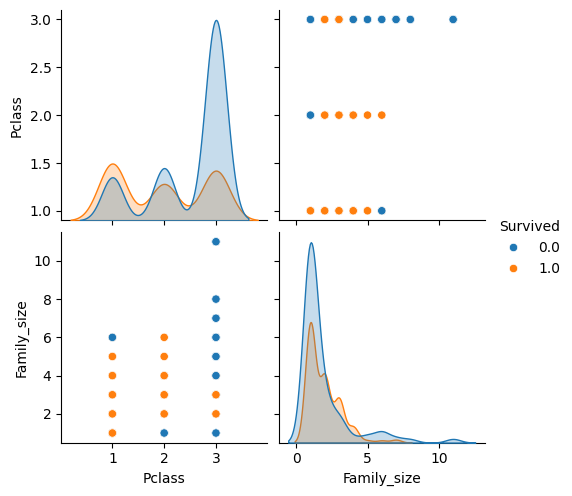

In [35]:
cat_cols,num_cols,cat_but_car = grab_col_names(df_final)
sns.pairplot(df_filtered[cat_cols],hue="Survived")


For ordinal categorical variables, LabelEncoder() is utilized. I use LabelEncoder() to convert the ordinal variables "Pclass" and "Fare_Category" to categorical ordinal variables after evaluating them as ordinal variables.

In [36]:
### Which one can be ordinal for categorical variables?

## Pclass,Fare_category
label_encoder = LabelEncoder()
df_final['Pclass_Encoded'] = label_encoder.fit_transform(df_final['Pclass'])
df_final['Fare_Category_Encoded'] = label_encoder.fit_transform(df_final['Fare_Category'])
df_final.drop("Pclass",axis=1,inplace=True)
df_final.drop("Fare_Category",axis=1,inplace=True)


In [37]:
df_final.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'Age_Group',
       'Family_size', 'Family_Group', 'Cabin_Letter', 'Ticket_Survival_Rate',
       'Pclass_Encoded', 'Fare_Category_Encoded'],
      dtype='object')

I remove the variables "Pclass", "Fare_Category", where I performed the LabelEncoder() operation, and the target variable "Survived" from the "cat_cols" list.

In [38]:
cat_cols.remove("Pclass")
cat_cols.remove("Fare_Category")
cat_cols.remove("Survived")


Applying the one-hotencoder (get_dummies) operation to all other categorical variables in the "cat_cols" list, I convert them to 1–0 variables that machine learning can process.

In [39]:
cat_cols_encoded = pd.get_dummies(df_final[cat_cols])

df_encoded = pd.concat([df_final,cat_cols_encoded],axis=1)
df_encoded.drop(cat_cols,axis=1,inplace=True)
df_final_encoded = df_encoded.copy()
df_encoded.head()

,Survived,Age,Fare,Pclass_Encoded,Fare_Category_Encoded,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Ticket_Survival_Rate_0.0,Ticket_Survival_Rate_0.5,Ticket_Survival_Rate_1.0,Age_Group_Baby,Age_Group_Child,Age_Group_Teenager,Age_Group_Young Adult,Age_Group_Adult,Age_Group_Middle-Aged,Age_Group_Senior
0,0.0,22.0,7.2500,2,4,False,True,False,False,True,...,False,True,False,False,False,False,True,False,False,False
1,1.0,38.0,71.2833,0,3,True,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
2,1.0,26.0,7.9250,2,1,True,False,False,False,True,...,False,True,False,False,False,False,True,False,False,False
3,1.0,35.0,53.1000,0,3,True,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0.0,35.0,8.0500,2,1,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False


I'm scaling the numerical variables "Fare" and "Age" by using StandardScaler(), and the outcomes will be a standard deviation of 1 and the mean of 0.

In [40]:
#### Scaler
scaler = StandardScaler()

# Select the columns you want to standardize
columns_to_scale = ["Fare", "Age"]

# Fit and transform the selected columns
df_encoded[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [41]:
df_encoded.head()

,Survived,Age,Fare,Pclass_Encoded,Fare_Category_Encoded,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Ticket_Survival_Rate_0.0,Ticket_Survival_Rate_0.5,Ticket_Survival_Rate_1.0,Age_Group_Baby,Age_Group_Child,Age_Group_Teenager,Age_Group_Young Adult,Age_Group_Adult,Age_Group_Middle-Aged,Age_Group_Senior
0,0.0,-0.560178,-0.503291,2,4,False,True,False,False,True,...,False,True,False,False,False,False,True,False,False,False
1,1.0,0.632897,0.734744,0,3,True,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
2,1.0,-0.261909,-0.490240,2,1,True,False,False,False,True,...,False,True,False,False,False,False,True,False,False,False
3,1.0,0.409196,0.383183,0,3,True,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0.0,0.409196,-0.487824,2,1,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,False


ML Model
I'll use machine learning models for RandomForestClassifier(), GradientBoosting Classifier(), LogisticRegression(), and XGBClassifier() to generate predictions.

In [42]:

train_df = df_encoded.iloc[0:891,:]
test_df = df_encoded.iloc[891:,:]

X_train =  train_df.drop(["Survived"],axis=1)
y_train = train_df["Survived"]
X_test = test_df.drop(["Survived"],axis=1)


We divide the "df_encoded" data set prepared for machine learning models as X_train-y_train and the "Survived" variable as X_test to make predictions.

In [43]:
rf_model = RandomForestClassifier(criterion= 'entropy', max_depth=8, min_samples_leaf = 2, min_samples_split=  2, n_estimators=  100)
rf_model.fit(X_train,y_train)
rf_cv = cross_val_score(rf_model,X_train,y_train, cv = 10,scoring = "accuracy").mean()
rf_cv

0.8439950062421971

Text(0.5, 1.0, 'Feature Importances')

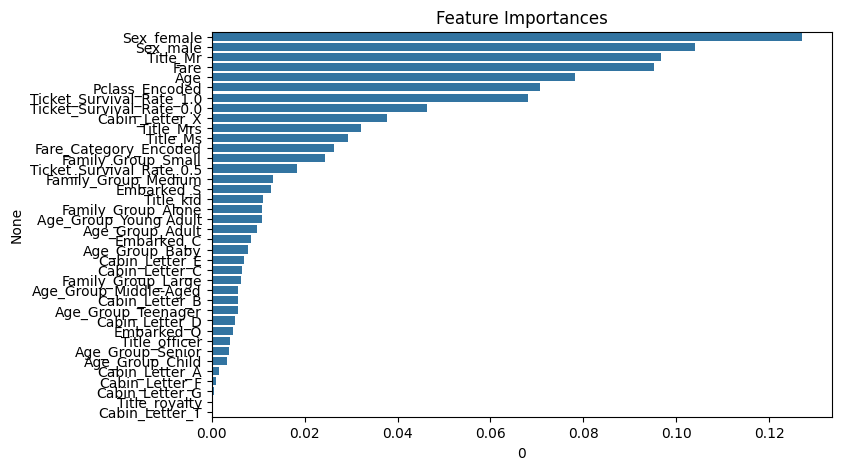

In [44]:

importances = pd.DataFrame(rf_model.feature_importances_,index = X_train.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)

plt.figure(figsize=(8, 5)) 
sns.barplot(x=0, y=importances.index, data=importances).set_title('Feature Importances')

In [45]:
lr_model = LogisticRegression(C=0.9, penalty='l2')
lr_model.fit(X_train,y_train)
lr_cv =cross_val_score(lr_model,X_train,y_train, cv = 10,scoring = "accuracy").mean()
lr_cv

0.845131086142322

In [46]:
gbm_model = GradientBoostingClassifier(n_estimators=100,
                          learning_rate= 0.01,
                          max_depth=3,
                          random_state=0)

gbm_cv =cross_val_score(gbm_model,X_train,y_train, cv = 10,scoring = "accuracy").mean()
gbm_cv

0.8361548064918851

In [47]:
xgb_model = XGBClassifier(n_estimators=100,
                          learning_rate= 0.01,
                          max_depth=6,
                          colsample_bytree= 0.75,
                          min_child_weight= 0.01,
                          subsample= 0.6,
                          random_state=0)

xgb_cv =cross_val_score(xgb_model,X_train,y_train, cv = 10,scoring = "accuracy").mean()
xgb_cv

0.8484893882646691

In [48]:
xgb_model.fit(X_train,y_train)
predictions = xgb_model.predict(X_test)

X_test["Survived"] = predictions
X_test["PassengerId"] = test["PassengerId"]
X_test["Survived"] =X_test["Survived"].astype(int)
output = X_test[["PassengerId","Survived"]]
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


I used XGBClassifier to complete my submission since it performs better and fast. With 80% accuracy, I was able to enter the Kaggle top 500 list.
I tried to explain basically what kind of operations can be performed on data in a machine learning project and enrich it with my codes. Therefore, you can increase this estimate value. For this, you can make a separate category just by linking age and gender, and you can get better results by improving the Machine learning tuning part. Without swimming in the sea, you cannot learn to swim :). Hope you enjoy!